In [1]:
import sys
sys.path.append("/home/gant/Documents/tpcanalysis/python_comp/src")
from openCSV import openCSV
from processUVWLines import processUVWLines
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import RANSACRegressor
from skimage.measure import LineModelND, ransac

In [2]:
#This version uses the UVW csv

data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-20T10-51-39.459_0000.csv") #25 314 568

#data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-16T10-18-38.616_0000.csv") #12
data_csv_uvw.readCSV()

entry_nr = 314

singular_entry_uvw = data_csv_uvw.m_data[data_csv_uvw.m_data["entry_nr"]==entry_nr]


if singular_entry_uvw.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")

The value  25  was found in the 'entry_nr' column.


Couldn't fit any more lines for plane W at i =  1
At plane  0 The equation is y =  0.045478616660715135  * x +  2.0354420085176397 

At plane  0 The equation is y =  -0.12449062349300473  * x +  29.15163757510472 

At plane  1 The equation is y =  0.07026650224226981  * x +  45.160208395006634 

At plane  1 The equation is y =  0.1819002276232191  * x +  28.780829127114146 

At plane  2 The equation is y =  -0.1065234300768455  * x +  78.90581402735263 



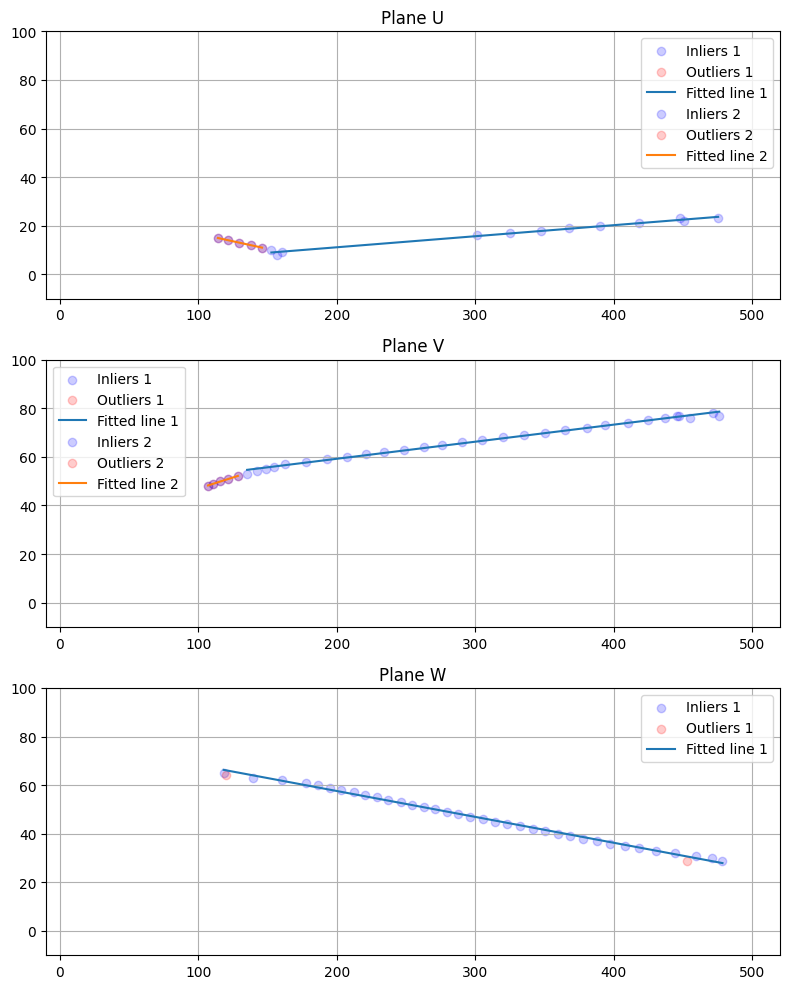

In [3]:
#Use RANSAC in 2D to fit a line to the data set. Format is UVW.
line_proc_uvw = processUVWLines(singular_entry_uvw)

nr_lines=2

verbose=True

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

model_uvw = line_proc_uvw.fitNLines(axes, nr_lines, True, 3, 1.25)

if(verbose):
    for i in range(len(model_uvw)):
        print("At plane ", model_uvw[i].plane, "The equation is y = ", model_uvw[i].slope, " * x + ", model_uvw[i].intercept, "\n")


# Adjust spacing between subplots
plt.tight_layout()


# Display the plot
plt.show()    

At plane  0 The equation is y =  0.05074478011243463  * x +  0.2933338858431517 

At plane  0 The equation is y =  0.0976143617089606  * x +  0.35669371736565486 

At plane  1 The equation is y =  0.07142049229365055  * x +  44.96035324895433 

At plane  1 The equation is y =  0.44362865467768736  * x +  -0.02449951934672334 

At plane  2 The equation is y =  -0.10920891238906451  * x +  79.55093163361751 



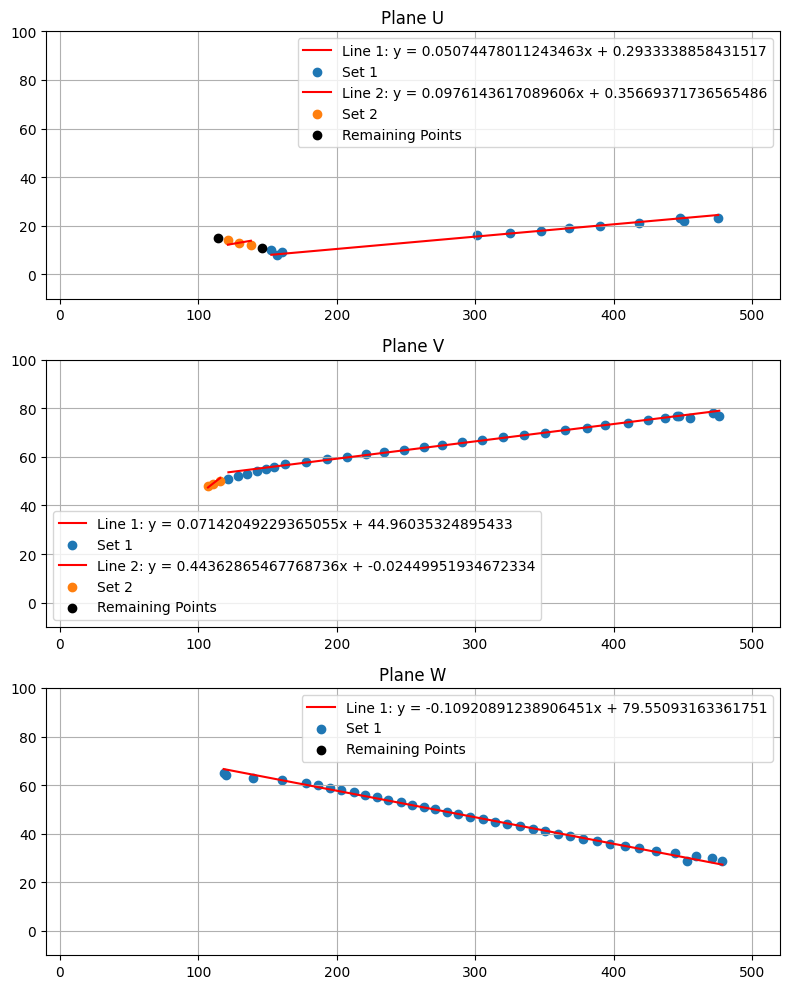

In [4]:
#Use Hough Transform in 2D
line_proc_uvw = processUVWLines(singular_entry_uvw)

nr_lines=200

verbose=True

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

model_hough = line_proc_uvw.fitNLinesHough(axes, nr_lines, True, 3, 2)

if(verbose):
    for i in range(len(model_hough)):
        print("At plane ", model_hough[i].plane, "The equation is y = ", model_hough[i].m, " * x + ", model_hough[i].b, "\n")


# Adjust spacing between subplots
plt.tight_layout()


# Display the plot
plt.show()    